In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
df = pd.read_table(r'../input/think-stats-dataset/Speed of light.txt', sep = ',')
speed = df['velocity of light in air (km/s)']

## 1. Optimal parameters
Outcomes of measurements follow probability distributions defined by the story of how the data came to be. When we looked at Michelson's speed of light in air measurements, we assumed that the results were `Normally distributed`.
### 1.1. Theory.
#### CDF of Michelson's measurements
We verified that both by looking at the PDF and the CDF, which was more effective because there is no binning bias. To compute and plot the CDF, we needed our old friends

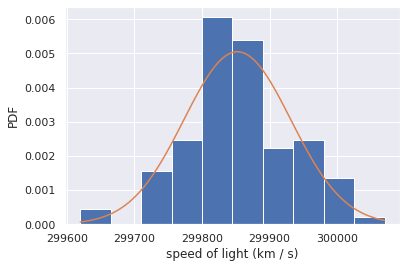

In [2]:
pi, muy, sigma = np.pi, np.mean(speed), np.std(speed)
x_pdf = np.linspace(min(speed), max(speed), 101)
y_pdf = np.exp(-(x_pdf - muy)**2 / (2*sigma**2)) / (np.sqrt(2*pi)*sigma)
plt.hist(speed, density = True)
plt.plot(x_pdf, y_pdf)
plt.xlabel('speed of light (km / s)')
plt.ylabel('PDF')
plt.show()

#### Reminder: ECDF (Empirical cdf)

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

- To compute the theoretical CDF by sampling, we passed two parameters into `np.random.normal`, the mean and standard deviation. The values we chose for these parameters were in fact the mean and standard deviation we calculated directly from the data.

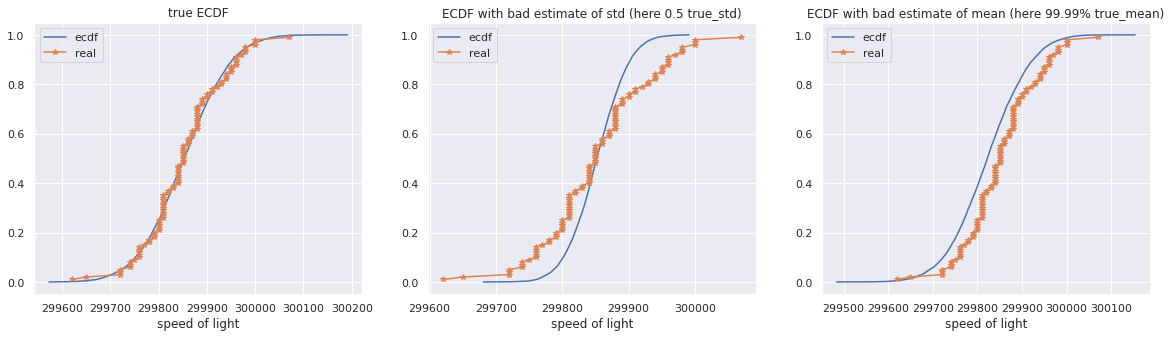

In [4]:
means = [muy, muy, 0.9999*muy]
stds = [sigma, 0.5*sigma, sigma]
titles = ['true ECDF', 
          'ECDF with bad estimate of std (here 0.5 true_std)',
          'ECDF with bad estimate of mean (here 99.99% true_mean)']
x_emp, y_emp = ecdf(speed)

plt.figure(figsize = (20, 5))
for k in range(3):
    plt.subplot(1, 3, k + 1)
    speed_sampling = np.random.normal(means[k], stds[k], size = 10000)
    x, y = ecdf(speed_sampling)    
    plt.plot(x, y, label = 'ecdf')
    plt.plot(x_emp, y_emp, marker = '*', label = 'real')
    plt.xlabel('speed of light')
    plt.title(titles[k])
    plt.legend()

#### Optimal parameters
So, if we believe that the process that generates our data gives Normally distributed results, the set of parameters that brings the model, in this case a Normal distribution, in **closest agreement** with the data uses the mean and standard deviation computed directly from the data. These are the `optimal parameters`.
#### Mass of MA large mouth bass
These are the optimal parameters.

Remember though, the parameters are only optimal for the model you chose for your data. When your model is wrong, the optimal parameters are not really meaningful. 

Finding the optimal parameters is not always as easy as just computing the `mean` and `standard deviation` from the data. We will encounter this later in this chapter when we do linear regressions and we rely on `built-in NumPy` functions to find the optimal parameters for us. 

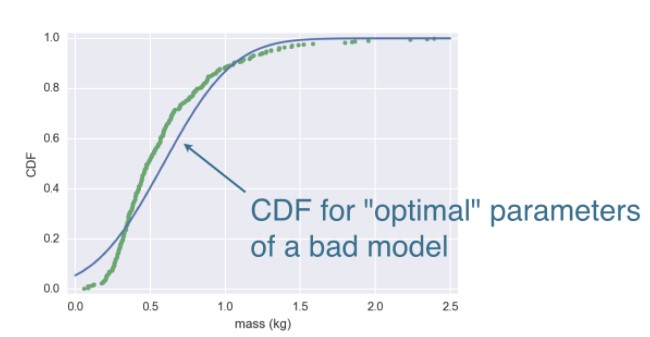

In [5]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Packages to do statistical inference
There are great tools in the Python ecosystem for doing statistical inference, including by optimization, `scipy.stats` and `statsmodels` being 2 good examples.

### 1.2. PRACTICES
#### Exercise 1.2.1. How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of `Major League Baseball` is stored in the array `nohitter_times`.

In [6]:
df_baseball = pd.read_table(r'../input/think-stats-dataset/Major League Baseball no-hitters.txt', sep = ',')
nohitter_times = df_baseball['date']

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is `Exponentially distributed`. As you have seen, the Exponential distribution has a single parameter, which we will call $\tau$, the typical interval time. The value of the parameter $\tau$ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing `inter-no-hitter` times from an exponential distribution with the $\tau$ you found and plot the histogram as an approximation to the PDF.
#### SOLUTION.

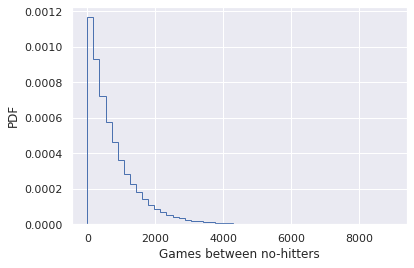

In [7]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             density = True, histtype = 'step', bins = 50)
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Exercise 1.2.2. Do the data follow our story?
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.
#### SOLUTION.

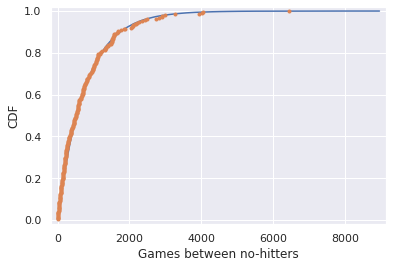

In [8]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

#### Exercise 1.2.3. How is this parameter optimal?
Now sample out of an `exponential distribution` with $\tau$ being twice as large as the optimal $\tau$. 

Do it again for $\tau$ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. 

Thus, the $\tau$ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.
#### SOLUTION.

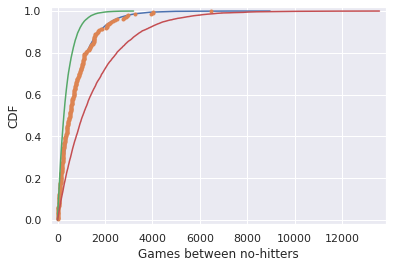

In [9]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau / 2, size = 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau * 2, size = 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

## 2. Linear regression by least squares
### 2.1. Theory.
Sometimes two variables are related. You may recall from the prequel to this course that we computed the Pearson correlation coefficient between Obama's vote share in each county in swings states and the total vote count of the respective counties. 

#### 2008 US swing state election results
The Pearson correlation coefficient is important to compute, but we might like to get a fuller understanding of how the data are related to each other. Specifically, we might suspect some underlying function gives the data its shape.

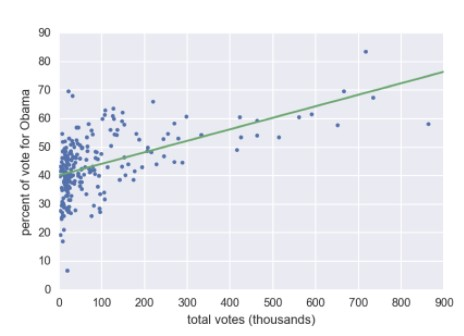

In [10]:
## Hình minh họa Image(fig1, height, width)

Often times a linear function is appropriate to describe the data, and this is what we will focus on in this course. The parameters of the function are the slope and intercept. 
- The slope sets how steep the line is, and 
- the intercept sets where the line crosses the y-axis. 

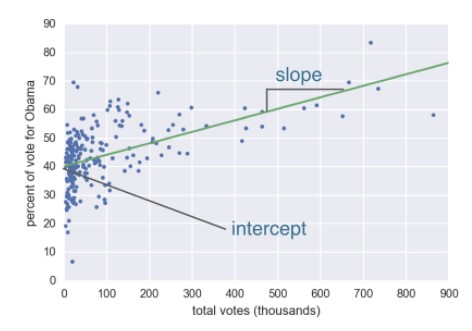

In [11]:
## Hình minh họa Image(fig1, height, width)

How do we figure out which slope and intercept best describe the data? 

A simple answer is that we want to choose the slope and intercept such that the data points collectively lie as close as possible to the line. This is easiest to think about by first considering one data point, say this one. 

The vertical distance between the data point and the line is called the residual. 

In this case, the residual has a negative value because the data point lies below the line. Each data point has a residual associated with it.

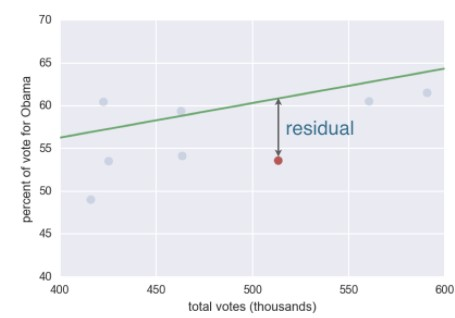

In [12]:
## Hình minh họa Image(fig1, height, width)

#### Least squares
We define the line that is closest to the data to be the line for which the sum of the squares of all of the residuals is minimal. This process, finding the parameters for which the sum of the squares of the residuals is minimal, is called "least squares". There are many algorithms to do this in practice.

#### Least squares with `np.polyfit()`
We will use the Numpy function polyfit, which performs least squares analysis with polynomial functions. We can use it because a linear function is a first degree polynomial. 

The first two arguments to this function are the x and y data. The third argument is the degree of the polynomial you wish to fit; for linear functions, we enter one. 

The function returns the slope and intercept of the best fit line. The slope tells us that we get about 4 more percent votes for Obama for every 100,000 additional voters in a county. Now that you know how to perform a linear regression,

### 2.2. PRACTICES
#### Exercise 2.2.1. EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between `female literacy` and `fertility` (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the `illiteracy rate`.

In [13]:
lit_fer_df = pd.read_table(r'../input/think-stats-dataset/Female literacy and fertility.txt', sep = ',')
illiteracy = lit_fer_df['female literacy']
fertility = lit_fer_df['fertility']

In [14]:
def pearson_r(rvs1, rvs2):
    """ Returns the coefficient-correlation of rvs1 and rvs2 """
    return np.corrcoef(rvs1, rvs2)[0, 1]

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.
#### SOLUTION

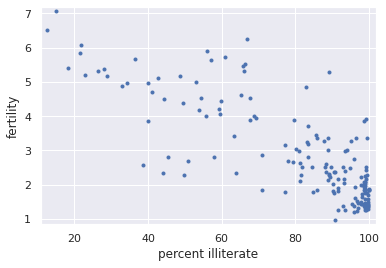

-0.8041324026815344


In [15]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker = '.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

#### Exercise 2.2.2. Linear regression
We will assume that `fertility` is a linear function of the female `illiteracy` rate. That is, , where  is the slope and  is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)
#### SOLUTION.

slope = -0.04979854809063435 children per woman / percent illiterate
intercept = 6.86790541969998 children per woman


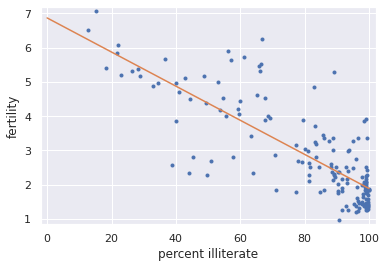

In [16]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, deg = 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

#### Exercise 2.2.3. How is it optimal?
The function `np.polyfit()` that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as `RSS` (for residual sum of squares). 

In this exercise, you will plot the function that is being optimized, the `RSS`, versus the slope parameter $a$. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope.

Where is it minimal?
#### SOLUTION.

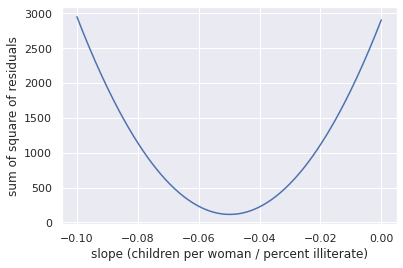

In [17]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(-0.1, 0., 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    # Here, fertility is the y_data and illiteracy the x_data
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## 3. The importance of EDA: Anscombe's quartet
In 1973, statistician Francis Anscombe published a paper that contained 4 fictitious `x-y` datasets, plotted here.  

That point becomes clear if we blindly go about doing parameter estimation on these data sets. 

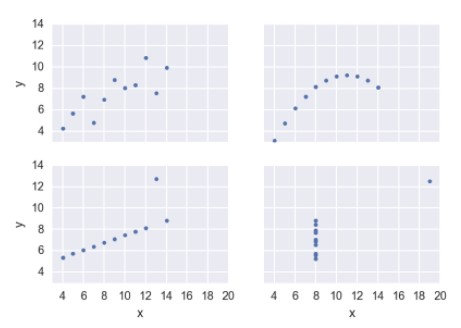

In [18]:
## Hình minh họa Image(fig1, height, width)

### 3.1. Theory
#### Anscombe's quartet
- First, let's look at the average x-values of the four data sets.

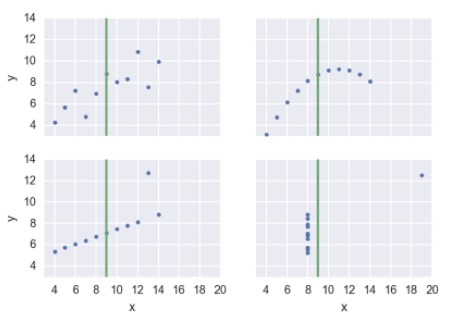

In [19]:
## Hình minh họa Image(fig1, height, width)

- They are all the same. How about the average `y-values`?

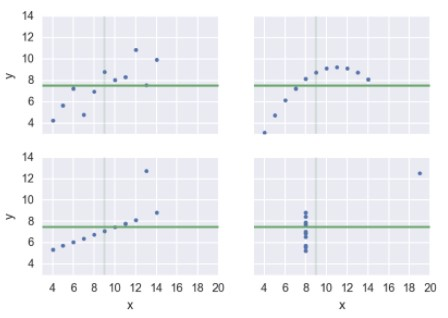

In [20]:
## Hình minh họa Image(fig1, height, width)

- Again, all the same. And what if we do a linear regression on each of the data sets?

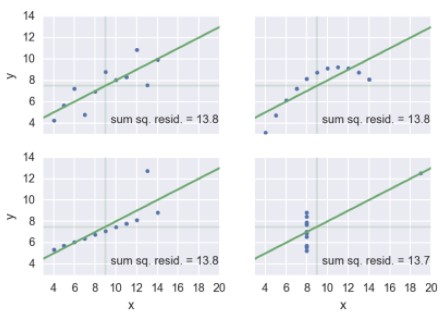

In [21]:
## Hình minh họa Image(fig1, height, width)

They all have the same line! Surely some of the fits are less optimal than others. Let's look at the sum of the squares of the residuals.
- They are all basically the same as well. Of course, Anscombe constructed the data sets so that this would happen.
- The point he was making is very important.

You already have some powerful tools for statistical inference. 

You can compute `summary statistics` and `optimal parameters`, including `linear regression` parameters, and by the end of the course, you will able to construct confidence intervals with quantify uncertainty about the parameter estimates. 

These are crucial skills for any data analysis, no doubt.

But look before you leap! This is a powerful reminder to do some graphic exploratory data analysis before you start computing and making judgments about your data. For example,
- This data set might be well modeled with a line, and the regression parameters will be meaningful. 
- The same is true of this data set, but the outlier throws off the slope and intercept. 
- After doing EDA, you should look into what is causing that outlier. This data set might also have a linear relationship between `x` and `y`, but from the plot, you can conclude that you should try to acquire more data for intermediate x values to make sure that it does.
- And this data set is definitely not linear, and you need to choose another model. 

Hence, explore your data first.

### 3.2. PRACTICES
#### Exercise 3.2.1. The importance of EDA
Why should exploratory data analysis be the first step in an analysis of data (after getting your data imported and cleaned, of course)?
#### Answers:
- 1) You can be protected from misinterpretation of the type demonstrated by `Anscombe's quartet`.
- 2) `EDA` provides a good starting point for planning the rest of your analysis.
- 3) `EDA` is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.

#### Exercise 3.2.2. Linear regression on appropriate Anscombe data
For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.
#### SOLUTION

0.5000909090909095 3.000090909090908


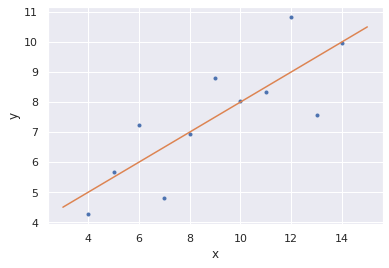

In [22]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, deg = 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

#### Exercise 3.2.3. Linear regression on all Anscombe data
Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; `anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`, where, for example, `x2` and `y2` are the $x$ and $y$ values for the second Anscombe data set.
#### SOLUTION

In [23]:
# Create anscombe_sample
anscombe_x = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
              np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
              np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
              np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]
anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68]),
              np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
              np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73]),
              np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56, 7.91,  6.89])]

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, deg = 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.000090909090908
slope: 0.5000000000000001 intercept: 3.00090909090909
slope: 0.49972727272727313 intercept: 3.0024545454545444
slope: 0.49990909090909086 intercept: 3.0017272727272735
